In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# Import Dataset
fire = pd.read_csv("C:\Local Disk (A);\Excelr\Assignment Excelr\\17 SVM\\forestfires.csv")

# EDA

In [3]:
fire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
fire.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Check null Values
fire.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [7]:
# Remove Duplicate Data
fire.duplicated().sum()

8

In [8]:
fire = fire.drop_duplicates()
fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


C:\Users\aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size_category', ylabel='count'>

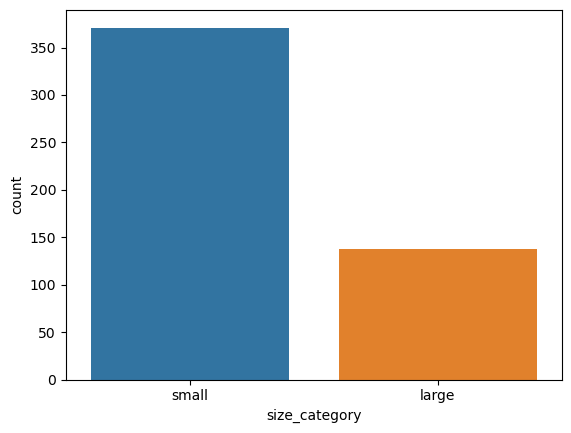

In [9]:
# Count of fire Category
sns.countplot(fire['size_category'])

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

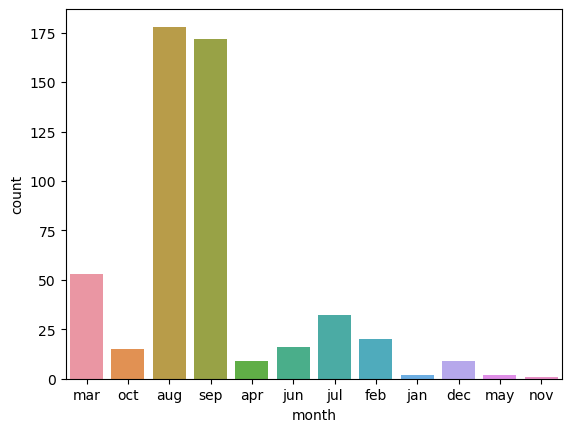

In [10]:
# Month plot for Which month most Forest Fire
sns.countplot(fire['month'])

# Preprocessing

In [11]:
# Split a Independent and Dependent Data
X = fire.iloc[:,2:30].values
y = fire.iloc[:,[30]].values

In [12]:
# Feature Scailing
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-7.96039810e-01, -1.31838569e+00, -1.82893094e+00, ...,
        -4.43678255e-02, -1.74253759e-01, -7.14412875e-01],
       [-3.25665522e-03, -1.17405250e+00,  4.89256926e-01, ...,
        -4.43678255e-02,  5.73875712e+00, -7.14412875e-01],
       [-3.25665522e-03, -1.04383887e+00,  5.61044929e-01, ...,
        -4.43678255e-02,  5.73875712e+00, -7.14412875e-01],
       ...,
       [-1.62485856e+00, -8.39889805e-01,  4.75141308e-01, ...,
        -4.43678255e-02, -1.74253759e-01, -7.14412875e-01],
       [ 6.81419706e-01,  5.61083388e-01,  2.69859884e-01, ...,
        -4.43678255e-02, -1.74253759e-01, -7.14412875e-01],
       [-2.00323234e+00, -1.68235633e+00, -1.77892132e+00, ...,
         2.25388553e+01, -1.74253759e-01, -7.14412875e-01]])

In [13]:
# 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [14]:
X_train

array([[ 0.44718832,  0.73836219,  0.47957764, ..., -0.04436783,
        -0.17425376, -0.71441288],
       [-0.23748804, -0.92460711, -1.79706997, ..., -0.04436783,
        -0.17425376, -0.71441288],
       [ 0.32106373, -0.06958987,  0.84819694, ..., -0.04436783,
        -0.17425376,  1.39975081],
       ...,
       [ 0.42917052, -0.54808576, -0.32743243, ..., -0.04436783,
        -0.17425376, -0.71441288],
       [ 0.64538411, -0.75203482, -0.42301534, ..., -0.04436783,
        -0.17425376, -0.71441288],
       [-0.07532785, -0.20921654,  0.30817371, ..., -0.04436783,
        -0.17425376, -0.71441288]])

In [15]:
y_train

array([['small'],
       ['small'],
       ['small'],
       ['large'],
       ['large'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['large'],
       ['large'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['large'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['large'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['large'],
       ['small'],
       ['small'],
       ['large'],
       ['small'],
       ['small'],
       ['large'],
       ['large'],
       ['small'],
       ['small'],
       ['small'],
       ['large'],
       ['small'],
       ['large'],
       ['small'],
       ['large'],
       ['small'],
       ['small'],
       ['large'],
       ['small'],
       ['small'],
       ['small'],
       ['s

In [16]:
X_test

array([[ 0.19493913, -1.16777715, -1.8833769 , ..., -0.04436783,
        -0.17425376, -0.71441288],
       [-0.36361263, -0.28922733,  0.65380471, ..., -0.04436783,
        -0.17425376,  1.39975081],
       [ 0.10485014,  0.58932249, -0.68798566, ..., -0.04436783,
        -0.17425376, -0.71441288],
       ...,
       [-1.12036019, -0.5778937 ,  0.50054942, ..., -0.04436783,
        -0.17425376,  1.39975081],
       [-0.54379062, -0.91048756, -1.79061712, ..., -0.04436783,
        -0.17425376, -0.71441288],
       [ 0.51925952,  0.61285507,  0.72922244, ..., -0.04436783,
        -0.17425376,  1.39975081]])

In [17]:
y_test

array([['small'],
       ['small'],
       ['small'],
       ['large'],
       ['large'],
       ['small'],
       ['large'],
       ['small'],
       ['small'],
       ['large'],
       ['large'],
       ['large'],
       ['small'],
       ['large'],
       ['small'],
       ['small'],
       ['small'],
       ['large'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['large'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['large'],
       ['large'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['large'],
       ['small'],
       ['small'],
       ['small'],
       ['large'],
       ['small'],
       ['small'],
       ['small'],
       ['s

# SVM Classification using SVC Linear Kernal

In [18]:
# SVC Model Building
model = SVC(kernel= 'linear', random_state=0)
model.fit(X_train , y_train)

C:\Users\aksha\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=0)

In [19]:
# Predict the test Data using Train Model
y_pred = model.predict(X_test)
y_pred

array(['small', 'small', 'small', 'large', 'large', 'small', 'large',
       'small', 'small', 'small', 'large', 'large', 'small', 'large',
       'small', 'small', 'small', 'large', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'large', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'large', 'large', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'large', 'small',
       'small', 'small', 'large', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'large', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'large', 'small', 'large',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'large', 'large', 'small', 'small', 'small', 'small', 'small',
       'small', 'large', 'small', 'small', 'large', 'small', 'large',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'sma

In [20]:
y_test

array([['small'],
       ['small'],
       ['small'],
       ['large'],
       ['large'],
       ['small'],
       ['large'],
       ['small'],
       ['small'],
       ['large'],
       ['large'],
       ['large'],
       ['small'],
       ['large'],
       ['small'],
       ['small'],
       ['small'],
       ['large'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['large'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['large'],
       ['large'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['large'],
       ['small'],
       ['small'],
       ['small'],
       ['large'],
       ['small'],
       ['small'],
       ['small'],
       ['s

In [21]:
# Check Confusion Matrix and Accuracy Score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[27  5]
 [ 1 95]]
0.953125


In [22]:
# Check train data 
y_pred = model.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
acc = accuracy_score(y_train, y_pred)
print(cm)
print(acc)

[[ 61  45]
 [  0 275]]
0.8818897637795275


# SVM Classification using SVC rbf Kernal

In [23]:
# SVC Model Building
model = SVC(kernel= 'rbf', random_state=0)
model.fit(X_train , y_train)

C:\Users\aksha\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=0)

In [24]:
# Predict the test Data using Train Model
y_pred = model.predict(X_test)
y_pred

array(['small', 'small', 'small', 'large', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'large', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'large', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'large', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'sma

In [25]:
y_test

array([['small'],
       ['small'],
       ['small'],
       ['large'],
       ['large'],
       ['small'],
       ['large'],
       ['small'],
       ['small'],
       ['large'],
       ['large'],
       ['large'],
       ['small'],
       ['large'],
       ['small'],
       ['small'],
       ['small'],
       ['large'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['large'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['large'],
       ['large'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['large'],
       ['small'],
       ['small'],
       ['small'],
       ['large'],
       ['small'],
       ['small'],
       ['small'],
       ['s

In [26]:
# Check Confusion Matrix and Accuracy Score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[ 5 27]
 [ 1 95]]
0.78125


In [27]:
# Check train data 
y_pred = model.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
acc = accuracy_score(y_train, y_pred)
print(cm)
print(acc)

[[ 24  82]
 [  0 275]]
0.7847769028871391
